<h1>M. Nielsen, Chapter 6, 100-node 1 layer softmax</h1>

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [4]:
import os
import numpy as np
import time
import random
import tensorflow as tf

In [6]:
from matplotlib import pyplot as plt

In [8]:
os.chdir(r"C:\Users\mchen\OneDrive\桌面\ml\code\tutorial\chapter3\20211119\multi_layer")

In [10]:
import mnist_loader
training_data, validation_data, test_data = mnist_loader.load_data_wrapper()

In [11]:
###############################################
#    load data from local directory
###############################################

train_x, train_y, val_x, val_y, test_x, test_y = [], [], [], [], [], []

training_data, validation_data, test_data = mnist_loader.load_data_wrapper()

for tra in training_data:
    img_tra_x = tra[0].reshape(28,28).tolist()
    img_tra_y = np.array(np.argmax(tra[1]), dtype=np.uint8)
    train_x.append(img_tra_x)
    train_y.append(img_tra_y)
print(np.shape(train_x))

for val in validation_data:
    img_val_x = val[0].reshape(28,28)
#     img_val_y = np.array(np.argmax(val[1]), dtype=np.uint8)
    img_val_y = np.array(val[1], dtype=np.uint8)
    val_x.append(img_val_x)
    val_y.append(img_val_y)
print(np.shape(val_x))

for tes in test_data:
    img_tes_x = tes[0].reshape(28,28)
    img_tes_y = np.array(tes[1], dtype=np.uint8)
    test_x.append(img_tes_x)
    test_y.append(img_tes_y)
print(np.shape(test_x))


train_x = np.array(train_x)
val_x = np.array(val_x)
test_x = np.array(test_x)

train_y = np.array(train_y)
val_y = np.array(val_y)
test_y = np.array(test_y)

(50000, 28, 28)
(10000, 28, 28)
(10000, 28, 28)


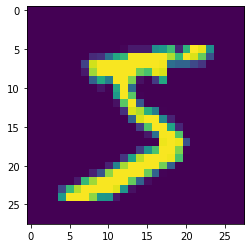

img label: 5


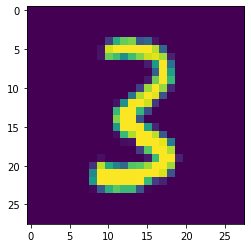

img label: 3


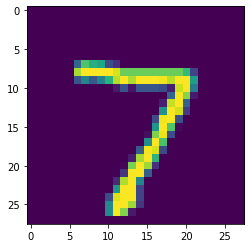

img label: 7


In [12]:
###############################################
#    checking data format:
###############################################
plt.imshow(train_x[0], interpolation='none')
plt.show()
print('img label:', train_y[0])

plt.imshow(val_x[0], interpolation='none')
plt.show()
print('img label:', val_y[0])

plt.imshow(test_x[0], interpolation='none')
plt.show()
print('img label:', test_y[0])


In [14]:
# ################################################################
# #   normal SGD method as described in chapter 1&2
# ################################################################
# tf.random.set_seed(42)
# ################################################################
# #    define model

# # initializer = tf.keras.initializers.VarianceScaling(
# # scale=0.1, mode='fan_in', distribution='uniform')
# # layer = tf.keras.layers.Dense(3, kernel_initializer=initializer)

# model = tf.keras.models.Sequential([
#     tf.keras.layers.Flatten(input_shape=(28, 28)),
#     tf.keras.layers.Dense(
#     30, 
#     activation=tf.nn.sigmoid,
#     kernel_initializer=tf.keras.initializers.RandomNormal(stddev=1.0),
#     bias_initializer=tf.keras.initializers.RandomNormal(stddev=1.0),
# #       kernel_regularizer=tf.keras.regularizers.L1(1.25)
#     ),
#     tf.keras.layers.Dense(10)
# ])

# n_eph = 60
# eta = 0.1

# loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
# model.compile(
#     optimizer=tf.keras.optimizers.SGD(
#         learning_rate=eta,
#         momentum=0.0,
#         nesterov=False,
#         name="SGD"),
#     loss=loss_fn,
#     metrics=['accuracy'])
# ################################################################


# ################################################################
# # save the model when val_acc is best
# checkpoint_filepath = r'C:\Users\mchen\OneDrive\桌面\ml\code\tutorial\chapter3\20211122\simple_sgd_model'

# model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
#     filepath=checkpoint_filepath,
#     save_weights_only=True,
#     monitor='val_accuracy',
#     mode='max',
#     save_best_only=True)
# ################################################################




# ################################################################
# #    train model  (how do i randomize mini_batches?)
# batch_size = 10

# history = model.fit(
#     train_x, train_y, 
#     epochs=n_eph,
#     batch_size=batch_size,
#     validation_data=(val_x, val_y),
#     callbacks=[model_checkpoint_callback],
#     shuffle=True
# )

# acc = history.history['accuracy']
# loss = history.history['loss']
# val_acc = history.history['val_accuracy']
# val_loss = history.history['val_loss']
# ################################################################


# ################################################################
# #    load the weights for the best epoch (best val accuracy)
# model.load_weights(checkpoint_filepath)
# ################################################################

# ################################################################
# #    evaluate test data at the best epoch
# [test_data_loss, test_data_accuracy] = model.evaluate(
#     test_x, test_y,
#     batch_size=len(test_x)
# )
# ################################################################


In [15]:
# plt.plot(acc, label='train acc., best: {:.3f}'.format(max(acc)))
# plt.plot(val_acc, label='validation acc. best: {:.3f}'.format(max(val_acc)))
# plt.title('normal SGD, eta={}, {} epochs'.format(eta, n_eph))
# plt.axvline(x=np.argmax(val_acc), c='r', ls=':', label='best epoch: {}'.format(np.argmax(val_acc)))
# plt.axhline(y=test_data_accuracy, c='r', label='test data accuracy at best epoch: {:.3f}'.format(test_data_accuracy))
# plt.legend()
# plt.show()

# from winsound import Beep
# Beep(1000, 100)

<h1>Trying Implementing 100-node 1 layer softmax using TF, following the example in M. Nielsen, Chapter 6</h1>	
network3.py
https://github.com/mnielsen/neural-networks-and-deep-learning/blob/master/src/network3.py

In [16]:
################################################################
#   normal SGD method w. softmax as described in chapter 6
################################################################
tf.random.set_seed(42)
################################################################
#    define model

# initializer = tf.keras.initializers.VarianceScaling(
# scale=0.1, mode='fan_in', distribution='uniform')
# layer = tf.keras.layers.Dense(3, kernel_initializer=initializer)

# I didn't notice any special weight initialization method in M. Nielsen's Network3.py,
# so I will just assume normal(0,1)


model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model.add(tf.keras.layers.Dense(
            100, 
            activation=tf.nn.sigmoid,
            kernel_initializer=tf.keras.initializers.RandomNormal(stddev=1.0),
            bias_initializer=tf.keras.initializers.RandomNormal(stddev=1.0)
            )
)
model.add(tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax))




n_eph = 60
eta = 0.1

loss_fn = tf.keras.losses.SparseCategoricalCrossentropy()
# loss_fn = tf.keras.losses.MeanSquaredError()



model.compile(
    optimizer=tf.keras.optimizers.SGD(
        learning_rate=eta,
        momentum=0.0,
        nesterov=False,
        name="SGD"),
    loss=loss_fn,
    metrics=['accuracy'])
################################################################


################################################################
# save the model when val_acc is best
checkpoint_filepath = r'C:\Users\mchen\OneDrive\桌面\ml\code\tutorial\chapter3\20211122\simple_sgd_model'

model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)
################################################################




################################################################
#    train model  (how do i randomize mini_batches?)
batch_size = 10

history = model.fit(
    train_x, train_y, 
    epochs=n_eph,
    batch_size=batch_size,
    validation_data=(val_x, val_y),
    callbacks=[model_checkpoint_callback],
    shuffle=True
)

acc = history.history['accuracy']
loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
################################################################


################################################################
#    load the weights for the best epoch (best val accuracy)
model.load_weights(checkpoint_filepath)
################################################################

################################################################
#    evaluate test data at the best epoch
[test_data_loss, test_data_accuracy] = model.evaluate(
    test_x, test_y,
    batch_size=len(test_x)
)
################################################################


Epoch 1/60
5000/5000 [==============================] - 6s 1ms/step - loss: 0.5392 - accuracy: 0.8337 - val_loss: 0.3507 - val_accuracy: 0.8922
Epoch 2/60
5000/5000 [==============================] - 6s 1ms/step - loss: 0.3466 - accuracy: 0.8950 - val_loss: 0.3033 - val_accuracy: 0.9091
Epoch 3/60
5000/5000 [==============================] - 6s 1ms/step - loss: 0.2917 - accuracy: 0.9113 - val_loss: 0.2684 - val_accuracy: 0.9188
Epoch 4/60
5000/5000 [==============================] - 6s 1ms/step - loss: 0.2564 - accuracy: 0.9219 - val_loss: 0.2630 - val_accuracy: 0.9226
Epoch 5/60
5000/5000 [==============================] - 7s 1ms/step - loss: 0.2300 - accuracy: 0.9298 - val_loss: 0.2408 - val_accuracy: 0.9282
Epoch 6/60
5000/5000 [==============================] - 6s 1ms/step - loss: 0.2093 - accuracy: 0.9364 - val_loss: 0.2232 - val_accuracy: 0.9332
Epoch 7/60
5000/5000 [==============================] - 6s 1ms/step - loss: 0.1914 - accuracy: 0.9418 - val_loss: 0.2133 - val_accuracy:

5000/5000 [==============================] - 6s 1ms/step - loss: 0.0159 - accuracy: 0.9983 - val_loss: 0.1961 - val_accuracy: 0.9551
Epoch 58/60
5000/5000 [==============================] - 6s 1ms/step - loss: 0.0154 - accuracy: 0.9983 - val_loss: 0.1967 - val_accuracy: 0.9560
Epoch 59/60
5000/5000 [==============================] - 6s 1ms/step - loss: 0.0148 - accuracy: 0.9984 - val_loss: 0.1975 - val_accuracy: 0.9554
Epoch 60/60
1/1 [==============================] - 0s 112ms/step - loss: 0.1823 - accuracy: 0.9553


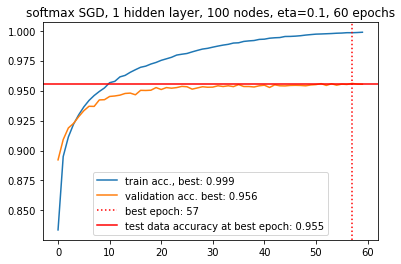

In [17]:
plt.plot(acc, label='train acc., best: {:.3f}'.format(max(acc)))
plt.plot(val_acc, label='validation acc. best: {:.3f}'.format(max(val_acc)))
plt.title('softmax SGD, 1 hidden layer, 100 nodes, eta={}, {} epochs'.format(eta, n_eph))
plt.axvline(x=np.argmax(val_acc), c='r', ls=':', label='best epoch: {}'.format(np.argmax(val_acc)))
plt.axhline(y=test_data_accuracy, c='r', label='test data accuracy at best epoch: {:.3f}'.format(test_data_accuracy))
plt.legend()
plt.show()

from winsound import Beep
Beep(1000, 100)

<h1>M. Nielsen got a max test accuracy of 97.8%. Here following the same network I got a max test accuracy of 95.5%. </h1>